# Description
A heart attack dataset with 1319 samples and 9 fields: 8 input features (age, gender, heart rate, systolic BP, diastolic BP, blood sugar, CK-MB, Troponin) and 1 output label (heart attack class: positive or negative). The dataset aims to identify key factors contributing to heart attacks.

# Import libraries

In [1334]:
import pandas as pd 
import numpy as np 
import os 

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import FunctionTransformer  
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import RandomOverSampler 
from sklearn.decomposition import PCA 

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import accuracy_score

# Reading data

In [1337]:
import pandas as pd
import numpy as np
data = pd.read_csv("Heart Attack.csv")

In [1339]:
data.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [1341]:
data.tail()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive
1318,51,1,94,157,79,134.0,50.89,1.770,positive


In [1343]:
type(data)

pandas.core.frame.DataFrame

# Exploring data

In [1346]:
data.sample(3)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
913,55,1,81,150,51,138.0,17.22,2.800,positive
1055,77,0,82,125,61,115.0,2.14,0.039,positive
855,65,1,67,177,105,120.0,3.68,0.011,negative


In [1348]:
data.dtypes

age                int64
gender             int64
impluse            int64
pressurehight      int64
pressurelow        int64
glucose          float64
kcm              float64
troponin         float64
class             object
dtype: object

In [1350]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [1352]:
data.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [1354]:
data.shape

(1319, 9)

In [1356]:
data.ndim

2

In [1358]:
data.columns

Index(['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose',
       'kcm', 'troponin', 'class'],
      dtype='object')

In [1360]:
data["age"].nunique()

75

In [1362]:
data.age.nunique()

75

In [1364]:
data.age.unique()

array([ 64,  21,  55,  58,  32,  63,  44,  67,  54,  47,  61,  86,  45,
        37,  60,  48,  52,  30,  50,  72,  42,  35,  68,  56,  65,  34,
        40,  46,  38,  57,  28,  49,  29,  80,  90,  62,  53,  75,  66,
        19,  77,  71,  43,  51,  59,  20,  36,  70,  78,  69,  73,  41,
        82,  25,  26,  76,  33,  39,  91,  31,  74,  22,  79,  81,  27,
        83,  24,  85,  88, 100,  23,  14,  87, 103,  84], dtype=int64)

In [1366]:
data["age"].unique()

array([ 64,  21,  55,  58,  32,  63,  44,  67,  54,  47,  61,  86,  45,
        37,  60,  48,  52,  30,  50,  72,  42,  35,  68,  56,  65,  34,
        40,  46,  38,  57,  28,  49,  29,  80,  90,  62,  53,  75,  66,
        19,  77,  71,  43,  51,  59,  20,  36,  70,  78,  69,  73,  41,
        82,  25,  26,  76,  33,  39,  91,  31,  74,  22,  79,  81,  27,
        83,  24,  85,  88, 100,  23,  14,  87, 103,  84], dtype=int64)

In [1368]:
data["gender"].unique()

array([1, 0], dtype=int64)

In [1370]:
data.head(3)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative


In [1372]:
data.age.value_counts(True)

age
60     0.080364
70     0.055345
50     0.051554
63     0.048522
65     0.047005
         ...   
88     0.000758
100    0.000758
14     0.000758
91     0.000758
84     0.000758
Name: proportion, Length: 75, dtype: float64

In [1374]:
data.age.value_counts().rename('count'),

data.age.value_counts(True).rename('%').mul(100)

age
60     8.036391
70     5.534496
50     5.155421
63     4.852161
65     4.700531
         ...   
88     0.075815
100    0.075815
14     0.075815
91     0.075815
84     0.075815
Name: %, Length: 75, dtype: float64

In [1376]:
data["age"].value_counts()

age
60     106
70      73
50      68
63      64
65      62
      ... 
88       1
100      1
14       1
91       1
84       1
Name: count, Length: 75, dtype: int64

In [1378]:
data["age"].sample(20)

31       35
896     100
905      60
915      54
1101     77
948      45
935      70
522      70
1081     35
1206     59
781      78
796      49
689      55
1031     63
1193     68
366      65
787      38
505      45
566      61
843      60
Name: age, dtype: int64

In [1380]:
data.age.value_counts()

age
60     106
70      73
50      68
63      64
65      62
      ... 
88       1
100      1
14       1
91       1
84       1
Name: count, Length: 75, dtype: int64

Text(0.5, 1.0, 'Number of Patient')

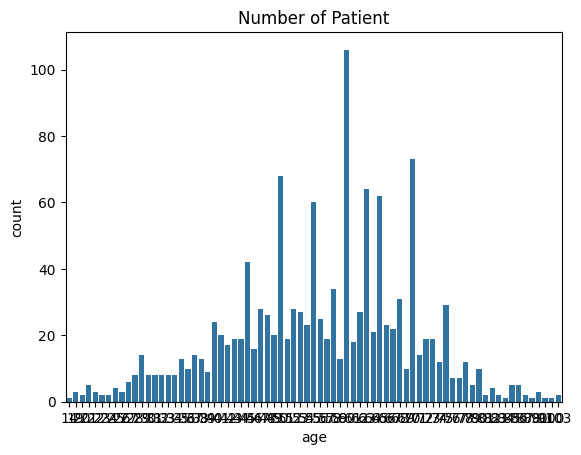

In [1382]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=data , x='age')
plt.title('Number of Patient')

In [1383]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [1384]:
data.sample(20)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
1235,47,1,93,105,71,113.0,1.730,0.434,positive
583,44,1,74,155,77,81.0,61.100,0.044,positive
664,62,1,75,134,85,109.0,5.770,0.010,negative
510,52,1,77,122,58,122.0,51.900,0.017,positive
1010,35,1,60,109,65,222.0,3.270,0.003,negative
201,75,0,66,150,95,115.0,2.960,0.280,positive
56,49,1,59,110,65,149.0,3.180,0.003,negative
1174,37,0,83,102,68,104.0,1.350,0.007,negative
646,70,1,80,125,75,150.0,5.020,0.016,positive
527,63,0,96,112,62,244.0,1.950,0.003,negative


In [1385]:
data.columns

Index(['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose',
       'kcm', 'troponin', 'class'],
      dtype='object')

In [1390]:
data["age"].value_counts()

age
60     106
70      73
50      68
63      64
65      62
      ... 
88       1
100      1
14       1
91       1
84       1
Name: count, Length: 75, dtype: int64

# Missing values

In [1393]:
data.isnull()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1314,False,False,False,False,False,False,False,False,False
1315,False,False,False,False,False,False,False,False,False
1316,False,False,False,False,False,False,False,False,False
1317,False,False,False,False,False,False,False,False,False


In [1395]:
data.isnull().any()

age              False
gender           False
impluse          False
pressurehight    False
pressurelow      False
glucose          False
kcm              False
troponin         False
class            False
dtype: bool

In [1397]:
data.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [1399]:
print('Missing data sum :')
print(data.isnull().sum())

print('\nMissing data percentage (%):')
print(data.isnull().sum()/data.count()*100)

Missing data sum :
age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

Missing data percentage (%):
age              0.0
gender           0.0
impluse          0.0
pressurehight    0.0
pressurelow      0.0
glucose          0.0
kcm              0.0
troponin         0.0
class            0.0
dtype: float64


# Seperate Categorical and Numerical Features

In [1402]:
cat_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  1
********************************************************************************
Categorical variables column name: ['class']


In [1404]:
cd = pd.DataFrame(cat_features)
cd.head()

,0
0,class


In [1406]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [1408]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  8
********************************************************************************
Numerical Variables Column:  ['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']


In [1410]:
print('*'*10)

**********


In [1412]:
numerical_features

['age',
 'gender',
 'impluse',
 'pressurehight',
 'pressurelow',
 'glucose',
 'kcm',
 'troponin']

In [1414]:
cat_features

['class']

# Checking Duplicating Values

In [1417]:
data.gender.duplicated()

0       False
1        True
2        True
3        True
4        True
        ...  
1314     True
1315     True
1316     True
1317     True
1318     True
Name: gender, Length: 1319, dtype: bool

In [1419]:
data.duplicated().sum()

0

In [1421]:
data['gender'].unique()

array([1, 0], dtype=int64)

In [1423]:
data['age'].sample(10)

1175    60
1024    65
679     43
930     74
509     65
992     72
1265    41
368     59
768     58
763     70
Name: age, dtype: int64

In [1425]:
data['age'].unique()

array([ 64,  21,  55,  58,  32,  63,  44,  67,  54,  47,  61,  86,  45,
        37,  60,  48,  52,  30,  50,  72,  42,  35,  68,  56,  65,  34,
        40,  46,  38,  57,  28,  49,  29,  80,  90,  62,  53,  75,  66,
        19,  77,  71,  43,  51,  59,  20,  36,  70,  78,  69,  73,  41,
        82,  25,  26,  76,  33,  39,  91,  31,  74,  22,  79,  81,  27,
        83,  24,  85,  88, 100,  23,  14,  87, 103,  84], dtype=int64)

In [1427]:
data['impluse'].unique()

array([  66,   94,   64,   70,   61,   40,   60,   76,   81,   73,   72,
         92,  135,   63,   65,  125,   62,   58,   93,   96,   95,   97,
         91,   87,   77,   80,   82,   83,   78,   90,   59,   57,   98,
       1111,  102,  103,  105,   74,   85,   75,   71,   68,   67,   56,
         89,   88,   86,   79,  100,   69,   84,  110,  120,  122,  119,
        116,  114,   55,   53,   54,  117,  112,  108,  134,  111,  101,
        113,   51,   52,   99,  132,   50,  107,  104,   49,   46,   20,
         36,   45], dtype=int64)

In [1429]:
data['glucose'].unique()

array([160. , 296. , 270. , 300. ,  87. , 102. , 135. , 100. , 198. ,
        92. ,  97. , 319. , 134. ,  96. , 274. ,  89. , 301. , 227. ,
       107. , 269. , 111. , 101. ,  95. , 279. , 166. , 321. ,  98. ,
       105. , 136. ,  82. , 117. , 120. , 208. , 125. , 103. ,  93. ,
        99. , 228. , 238. , 133. , 113. ,  91. , 114. , 149. , 110. ,
       251. , 191. , 334. , 109. , 201. , 167. ,  85. , 112. , 123. ,
        86. , 177. ,  90. , 115. , 392. , 147. , 141. , 222. , 174. ,
       162. , 219. , 189. , 193. , 181. , 387. , 121. , 294. , 116. ,
        88. , 240. , 132. , 159. ,  81. , 266. , 142. , 244. , 130. ,
       182. ,  94. ,  83. , 241. , 318. ,  66. , 156. , 108. , 322. ,
       187. , 122. , 362. , 180. , 127. , 131. ,  84. , 137. , 242. ,
       106. , 197. , 152. , 169. , 347. , 104. , 165. , 126. , 215. ,
        61. ,  80. , 195. , 150. , 194. , 233. , 462. , 422. , 245. ,
       168. , 188. , 129. , 200. , 146. , 140. , 382. , 217. , 303. ,
       154. , 221. ,

In [1431]:
data['kcm'].unique()

array([  1.8  ,   6.75 ,   1.99 ,  13.87 ,   1.08 ,   1.83 ,   0.71 ,
       300.   ,   2.35 ,   2.84 ,   2.39 ,   3.43 ,   1.42 ,   2.57 ,
         1.49 ,   1.11 ,   0.606,   2.89 ,   1.6  ,  94.79 ,   0.665,
        50.46 ,  38.72 ,   2.11 ,   2.93 ,   1.61 ,   0.493,   1.31 ,
         4.58 ,   6.48 ,   0.929,   1.37 ,   6.78 ,   4.24 ,   1.3  ,
         0.609,  15.23 ,   1.54 ,  16.95 ,   2.97 ,   4.22 ,   1.29 ,
         4.8  ,   1.33 ,   1.19 ,   0.78 ,   2.28 ,   4.39 ,  19.47 ,
         2.41 ,   3.18 ,  36.24 ,   2.21 ,   2.19 ,   5.33 ,   5.22 ,
         1.63 ,   1.24 ,   5.8  ,   3.29 ,   0.937,   4.45 ,   4.02 ,
        18.15 ,   0.865,   3.3  ,   0.718,   3.45 ,   7.65 ,   4.3  ,
         0.994,   1.53 ,  31.97 ,   2.91 ,   3.2  ,   9.35 ,  12.02 ,
         4.66 ,   4.18 ,   5.81 ,   0.633,   2.69 ,   1.06 ,   4.82 ,
         2.13 ,   2.85 ,   6.91 ,   1.98 ,  19.5  ,   0.468, 165.1  ,
         1.64 ,   1.87 ,   1.69 ,   3.27 ,   3.75 ,   1.51 ,   2.16 ,
         5.27 ,   1.

In [1433]:
data['class'].nunique()

2

In [1435]:
data['class'].unique()

array(['negative', 'positive'], dtype=object)

In [1437]:
data.columns

Index(['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose',
       'kcm', 'troponin', 'class'],
      dtype='object')

In [1439]:
data['troponin'].unique()

array([1.20e-02, 1.06e+00, 3.00e-03, 1.22e-01, 4.00e-03, 2.37e+00,
       1.10e-02, 6.00e-03, 1.30e-02, 5.37e+00, 1.70e-02, 7.76e-01,
       2.00e-02, 5.00e-03, 4.91e-01, 6.12e-01, 1.39e+00, 7.00e-03,
       1.00e+01, 8.30e+00, 2.10e-02, 1.15e+00, 1.46e-01, 8.00e-03,
       2.60e-02, 5.30e-02, 9.00e-03, 6.70e-02, 4.00e-02, 1.00e-02,
       3.10e-02, 1.50e-02, 7.60e-02, 5.20e-02, 1.01e+00, 8.90e-02,
       2.80e-02, 7.03e-01, 8.50e-02, 2.19e-01, 8.64e-01, 1.05e-01,
       4.80e-02, 8.88e-01, 1.60e-02, 1.07e+00, 2.20e-02, 6.05e+00,
       7.10e-02, 1.03e-01, 2.30e-02, 3.80e-02, 5.10e-02, 2.90e-02,
       1.40e-02, 2.23e+00, 1.55e+00, 1.84e+00, 6.40e-01, 7.67e+00,
       6.10e-02, 9.40e-02, 2.70e-02, 5.40e-02, 2.52e-01, 1.79e+00,
       1.95e+00, 3.92e-01, 3.27e-01, 4.60e-02, 1.24e+00, 1.78e-01,
       1.90e-02, 1.97e+00, 6.81e-01, 1.06e-01, 1.46e+00, 6.30e-02,
       1.23e+00, 2.86e+00, 1.64e-01, 1.86e+00, 3.20e-02, 2.40e-02,
       2.50e-02, 1.42e-01, 2.99e+00, 1.00e-03, 1.71e-01, 2.80e

In [1441]:
data['age'].nunique()

75

In [1443]:
data['age'].unique()

array([ 64,  21,  55,  58,  32,  63,  44,  67,  54,  47,  61,  86,  45,
        37,  60,  48,  52,  30,  50,  72,  42,  35,  68,  56,  65,  34,
        40,  46,  38,  57,  28,  49,  29,  80,  90,  62,  53,  75,  66,
        19,  77,  71,  43,  51,  59,  20,  36,  70,  78,  69,  73,  41,
        82,  25,  26,  76,  33,  39,  91,  31,  74,  22,  79,  81,  27,
        83,  24,  85,  88, 100,  23,  14,  87, 103,  84], dtype=int64)

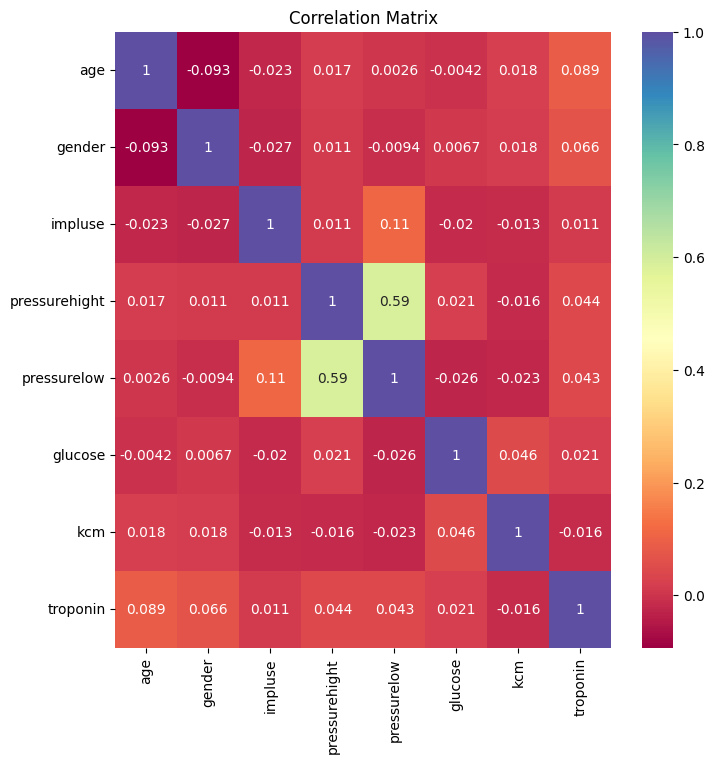

In [1445]:
corr = data.drop(columns=['class']).corr()

plt.figure(figsize=(8, 8))
sns.heatmap(data=corr, annot=True, cmap='Spectral')
plt.title("Correlation Matrix")
plt.show()

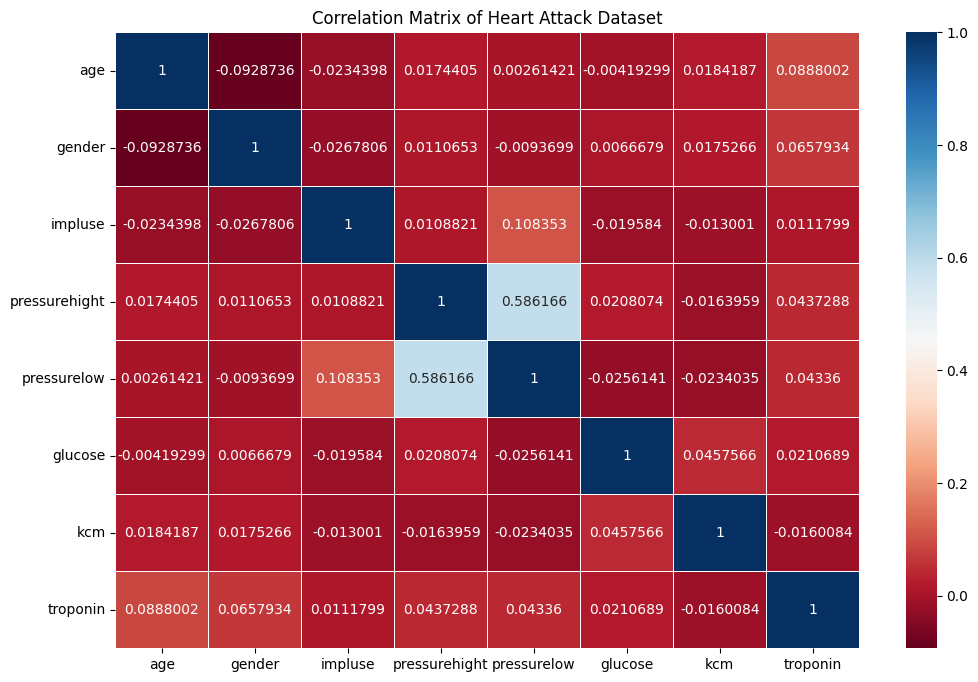

In [1446]:
fig = plt.figure(figsize=(12, 8))
corr = data.drop(columns=['class']).corr()
sns.heatmap(corr, linewidths=0.5, cmap="RdBu", annot=True, fmt="g")
plt.title("Correlation Matrix of Heart Attack Dataset")
plt.show()

In [1448]:
corr_matrix = data.drop(columns=['class']).corr().round(2)
corr_matrix


,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
age,1.00,-0.09,-0.02,0.02,0.00,-0.00,0.02,0.09
gender,-0.09,1.00,-0.03,0.01,-0.01,0.01,0.02,0.07
impluse,-0.02,-0.03,1.00,0.01,0.11,-0.02,-0.01,0.01
pressurehight,0.02,0.01,0.01,1.00,0.59,0.02,-0.02,0.04
pressurelow,0.00,-0.01,0.11,0.59,1.00,-0.03,-0.02,0.04
glucose,-0.00,0.01,-0.02,0.02,-0.03,1.00,0.05,0.02
kcm,0.02,0.02,-0.01,-0.02,-0.02,0.05,1.00,-0.02
troponin,0.09,0.07,0.01,0.04,0.04,0.02,-0.02,1.00


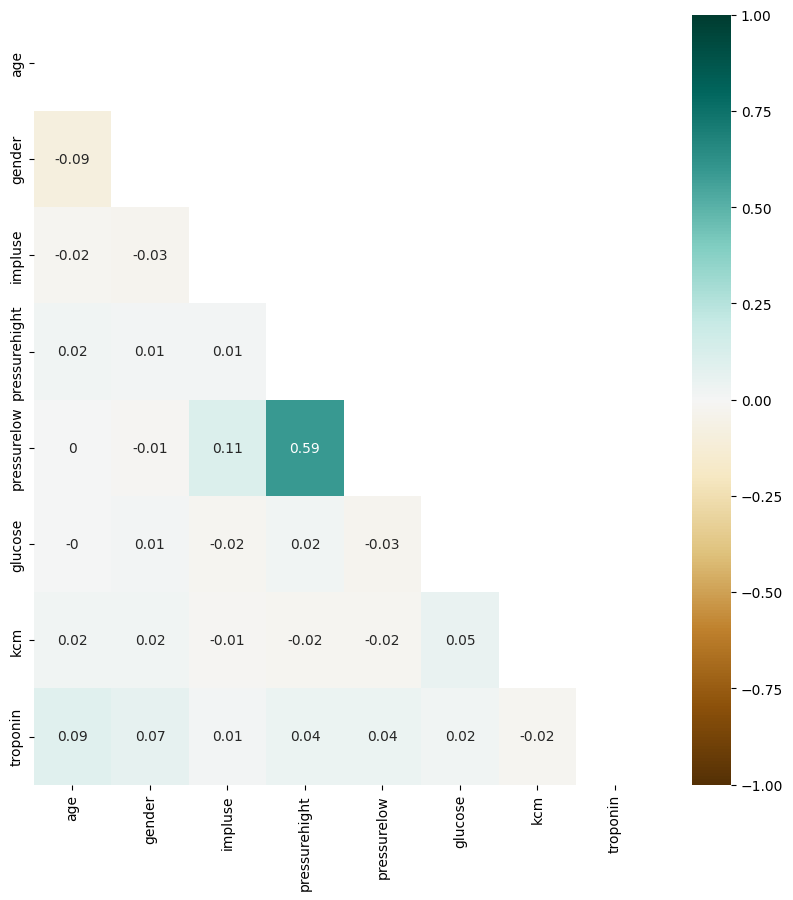

In [1449]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, center=0, vmin=-1, vmax=1, mask=mask, annot=True, cmap='BrBG')
plt.show()

In [1451]:
cat_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  1
********************************************************************************
Categorical variables column name: ['class']


In [1453]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  8
********************************************************************************
Numerical Variables Column:  ['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']


# Visualizing Categorical Features

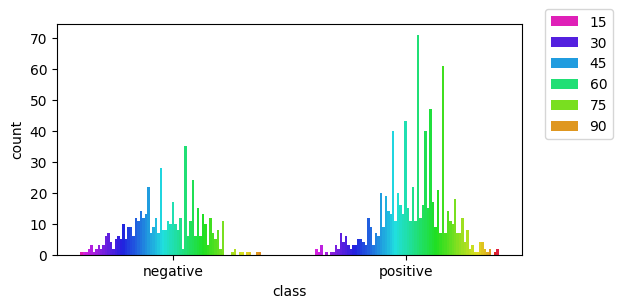

In [1458]:
for col in cat_features[:]:
    plt.figure(figsize=(6,3), dpi=100)
    sns.countplot(data=data,x=col,hue ='age',palette='gist_rainbow_r')
    plt.legend(loc=(1.05,0.5))

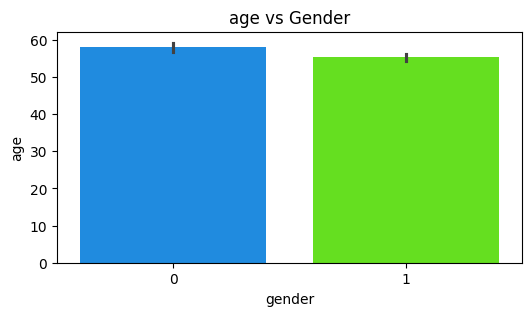

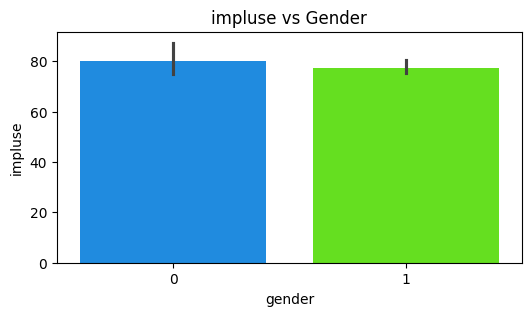

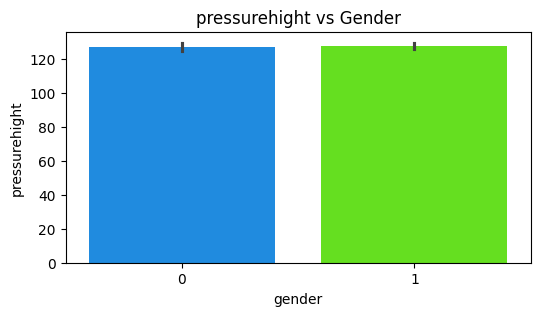

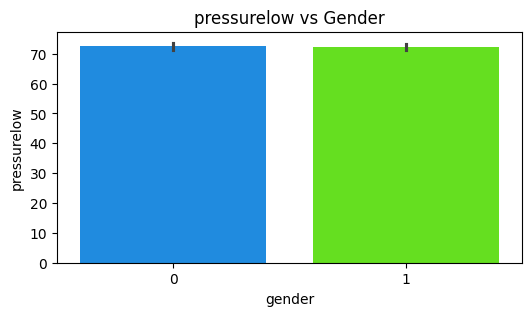

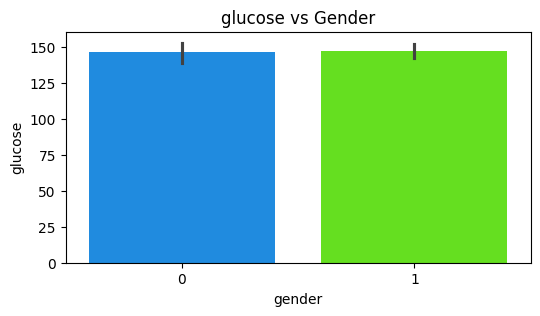

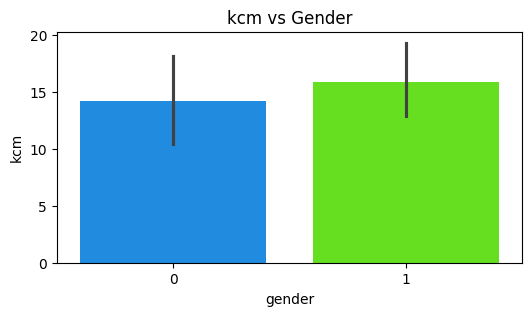

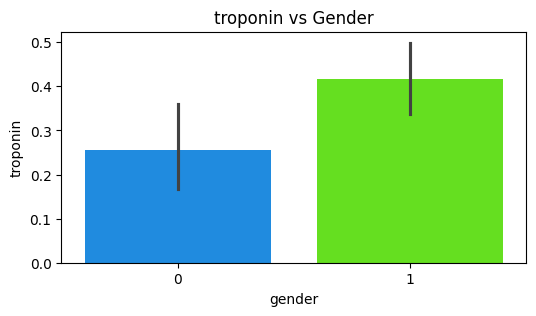

In [1459]:
numerical_features = ['age', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']

for col in numerical_features:
    plt.figure(figsize=(6, 3), dpi=100)
    sns.barplot(data=data, x='gender', y=col, hue='gender', palette='gist_rainbow_r', legend=False)
    plt.title(f'{col} vs Gender')
    plt.show()


# Handling Missing Values

In [1462]:
data.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [1464]:
data.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [1467]:
data["glucose"] = data["glucose"].fillna(data["glucose"].mean())

In [1469]:
data.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

# dropping irrelevant feature

In [1472]:
train  = data.drop(['class'],axis=1)
train

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
0,64,1,66,160,83,160.0,1.80,0.012
1,21,1,94,98,46,296.0,6.75,1.060
2,55,1,64,160,77,270.0,1.99,0.003
3,64,1,70,120,55,270.0,13.87,0.122
4,55,1,64,112,65,300.0,1.08,0.003
...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006
1315,66,1,84,125,55,149.0,1.33,0.172
1316,45,1,85,168,104,96.0,1.24,4.250
1317,54,1,58,117,68,443.0,5.80,0.359


In [1474]:
train.columns

Index(['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose',
       'kcm', 'troponin'],
      dtype='object')

In [1476]:
train.shape

(1319, 8)

In [1478]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 82.6 KB


In [1480]:
train_data_cat = train.select_dtypes("object")
train_data_num = train.select_dtypes("number")

In [1482]:
train_data_cat.head(3)

""
0
1
2


In [1484]:
train_data_num.head(3)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
0,64,1,66,160,83,160.0,1.80,0.012
1,21,1,94,98,46,296.0,6.75,1.060
2,55,1,64,160,77,270.0,1.99,0.003


# Converting categorical features into numerical

In [1487]:
data_encoded = pd.get_dummies(data, columns=['gender'])
data_encoded.head()


,age,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class,gender_0,gender_1
0,64,66,160,83,160.0,1.80,0.012,negative,False,True
1,21,94,98,46,296.0,6.75,1.060,positive,False,True
2,55,64,160,77,270.0,1.99,0.003,negative,False,True
3,64,70,120,55,270.0,13.87,0.122,positive,False,True
4,55,64,112,65,300.0,1.08,0.003,negative,False,True


In [1489]:
data = pd.concat([data_encoded, train_data_num], axis=1, join="outer")
data.head()


,age,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class,gender_0,gender_1,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
0,64,66,160,83,160.0,1.80,0.012,negative,False,True,64,1,66,160,83,160.0,1.80,0.012
1,21,94,98,46,296.0,6.75,1.060,positive,False,True,21,1,94,98,46,296.0,6.75,1.060
2,55,64,160,77,270.0,1.99,0.003,negative,False,True,55,1,64,160,77,270.0,1.99,0.003
3,64,70,120,55,270.0,13.87,0.122,positive,False,True,64,1,70,120,55,270.0,13.87,0.122
4,55,64,112,65,300.0,1.08,0.003,negative,False,True,55,1,64,112,65,300.0,1.08,0.003


# seperate dependant and independant feature

In [1492]:
y = data['age']
x = data.drop('age', axis = 1)

In [1494]:
print(x.shape)
print(y.shape)

(1319, 16)
(1319, 2)


# scailing the data

In [1497]:

x = data.drop(columns=['class'])

sc = StandardScaler()
x = sc.fit_transform(x)

In [1499]:
x

array([[ 5.72357956e-01, -2.39032215e-01,  1.25721470e+00, ...,
         1.78459449e-01, -2.90961900e-01, -3.02342376e-01],
       [-2.57963993e+00,  3.03491001e-01, -1.11709835e+00, ...,
         1.99434379e+00, -1.84072428e-01,  6.05700979e-01],
       [-8.73625310e-02, -2.77783874e-01,  1.25721470e+00, ...,
         1.64718943e+00, -2.86859072e-01, -3.10140458e-01],
       ...,
       [-8.20385295e-01,  1.29108539e-01,  1.56357767e+00, ...,
        -6.76074358e-01, -3.03054447e-01,  3.36968791e+00],
       [-1.60664807e-01, -3.94038849e-01, -3.89486287e-01, ...,
         3.95710113e+00, -2.04586569e-01, -1.68298262e-03],
       [-3.80571637e-01,  3.03491001e-01,  1.14232858e+00, ...,
        -1.68694910e-01,  7.69079350e-01,  1.22088302e+00]])

# Splitting data into Training and Testing

In [1502]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.svm import SVC
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

# Splitting the dataset
training data 70%

testing data 30%

In [1505]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)
X_train.shape, X_test.shape

((923, 17), (396, 17))

# Building Classifiers

In [1508]:
accuracy = {}

# Confusion Matrix

In [1511]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score





# Step 1: Encode 'class' as 0 (negative) and 1 (positive)

In [1514]:

data['class'] = data['class'].map({'negative': 0, 'positive': 1})


# Step 2: Separate features (X) and target (y)

In [1517]:

X = data.drop(columns=['class'])
y = data['class']


# Step 3: Scale the numeric features (StandardScaler)

In [1520]:


sc = StandardScaler()
X_scaled = sc.fit_transform(X)



# Step 4: Split the data into training and testing sets (70% training, 30% testing)

In [1523]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)



# Step 5: Initialize and train the Logistic Regression model

In [1526]:

lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=200)



# Step 6: Make predictions on the test data

In [1529]:

y_pred = lr.predict(X_test)




# Step 7: Calculate accuracy

In [1532]:

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 79.55%



# Step 8: Generate confusion matrix

In [1535]:

cm = confusion_matrix(y_test, y_pred)


# Step 9: Create a DataFrame for confusion matrix visualization

In [1538]:


conf_matrix = pd.DataFrame(data=cm, columns=['Predicted: 0', 'Predicted: 1'],
                           index=['Actual: 0', 'Actual: 1'])



# Step 10: Plot confusion matrix with heatmap

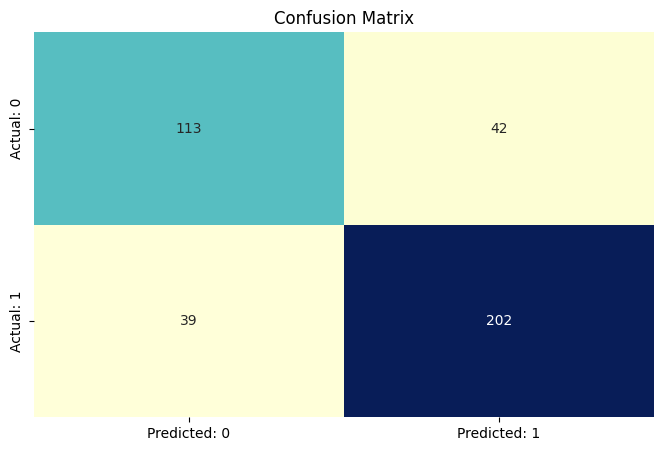

In [1553]:

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix")
plt.show()

# Classification report

In [1560]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['class'] = le.fit_transform(data['class']) 


# Predicting

In [1563]:
y_pred_test = lr.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

In [1565]:
test.sample(10)

,Actual,Y test predicted
1015,1,1
209,0,1
566,0,1
1009,0,0
10,0,0
949,0,1
266,1,1
244,1,1
939,1,1
309,1,1


# DecisionTreeClassifier

In [1568]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



# Initialize the DecisionTreeClassifier with max_depth=3

In [1571]:

dtc = DecisionTreeClassifier(max_depth=3)


# Fit the model on the training data

In [1574]:

dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)




# Predict on the test set

In [1577]:

y_pred2 = dtc.predict(X_test)


# Calculate and print the accuracy score

In [1580]:

accuracy_dtc = accuracy_score(y_test, y_pred2)
print(f"Decision Tree Accuracy: {accuracy_dtc * 100:.2f}%")

Decision Tree Accuracy: 97.98%





# Store the accuracy in the accuracy dictionary

In [1583]:


accuracy = {}
accuracy[str(dtc)] = accuracy_dtc * 100


# Optionally, print the accuracy dictionary

In [1586]:

print("Accuracy dictionary:", accuracy)


Accuracy dictionary: {'DecisionTreeClassifier(max_depth=3)': 97.97979797979798}


<Axes: >

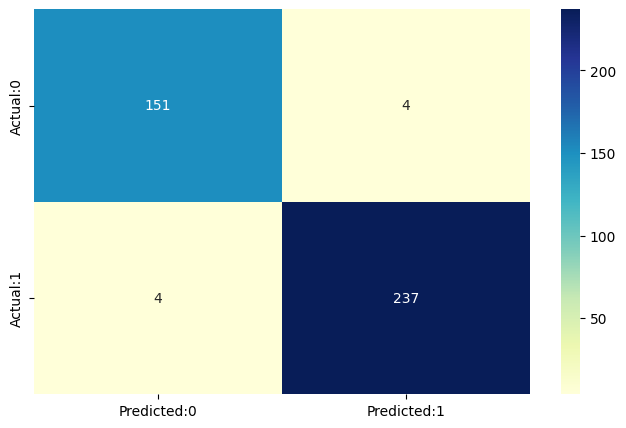

In [1588]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred2)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [1590]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       155
           1       0.98      0.98      0.98       241

    accuracy                           0.98       396
   macro avg       0.98      0.98      0.98       396
weighted avg       0.98      0.98      0.98       396



In [1592]:

y_pred_test = dtc.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

In [1594]:
test.head(5)

,Actual,Y test predicted
677,1,1
1046,0,0
610,0,0
49,0,0
1284,1,1


In [1596]:
rfc = RandomForestClassifier(max_depth=5)
rfc.fit(X_train, y_train)
y_pred3 = rfc.predict(X_test)
print(accuracy_score(y_test, y_pred3))
accuracy[str(rfc)] = accuracy_score(y_test, y_pred3)*100

0.9797979797979798


<Axes: >

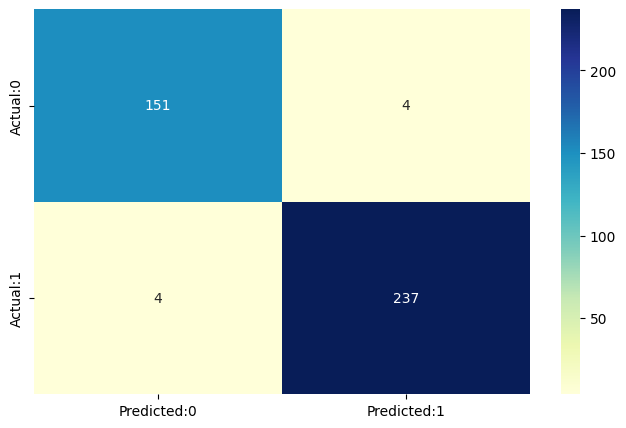

In [1598]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred3)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [1600]:

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gbc.fit(X_train, y_train)
y_pred4 = gbc.predict(X_test)
print(accuracy_score(y_test, y_pred4))
accuracy[str(gbc)] = accuracy_score(y_test, y_pred4)*100

0.9797979797979798


<Axes: >

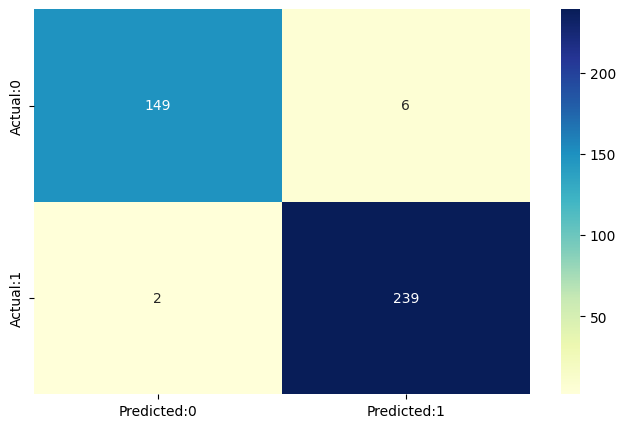

In [1601]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred4)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# SVM

In [1605]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred5 = svc.predict(X_test)
print(accuracy_score(y_test, y_pred5))
accuracy[str(svc)] = accuracy_score(y_test, y_pred5)*100

0.7045454545454546


<Axes: >

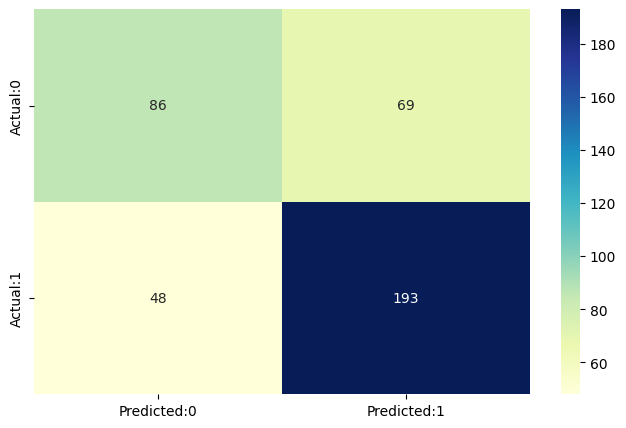

In [1607]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred5)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [1608]:
accuracy

{'DecisionTreeClassifier(max_depth=3)': 97.97979797979798,
 'RandomForestClassifier(max_depth=5)': 97.97979797979798,
 'GradientBoostingClassifier()': 97.97979797979798,
 'SVC()': 70.45454545454545}

# Handling this data using SMOTE

In [1612]:

from imblearn.over_sampling import SMOTE

In [1614]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd





# Assuming 'data' is your dataframe and 'class' is the target column

In [1617]:
X = data.drop('class', axis=1)  
y = data['class'] 

# Step 1: Split the dataset into training and testing sets (80% train, 20% test)

In [1620]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Apply SMOTE to the training set to balance the classes

In [1623]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


# Step 3: Standardize the features using StandardScaler (optional but recommended)


In [1626]:
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Step 4: Initialize and train the Decision Tree Classifier


In [1629]:
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train_res, y_train_res)


DecisionTreeClassifier(max_depth=3)



# Step 5: Make predictions on the test set


In [1632]:
y_pred2 = dtc.predict(X_test)





# Step 6: Calculate and print the accuracy score


In [1635]:
accuracy_dtc = accuracy_score(y_test, y_pred2)
print(f"Decision Tree Accuracy with SMOTE: {accuracy_dtc * 100:.2f}%")


Decision Tree Accuracy with SMOTE: 97.73%


# Splitting the oversampling data

In [1639]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1055, 17)
(264, 17)
(1055,)
(264,)


In [1641]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)
print(accuracy_score(y_test, y_pred1))
accuracy[str(lr)] = accuracy_score(y_test, y_pred1)*100

0.5606060606060606


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

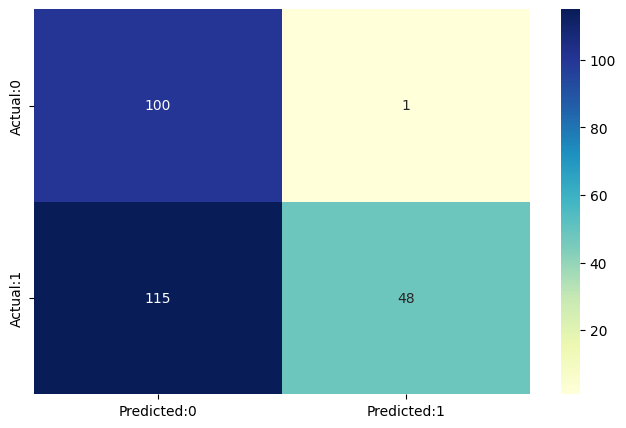

In [1643]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [1645]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.47      0.99      0.63       101
           1       0.98      0.29      0.45       163

    accuracy                           0.56       264
   macro avg       0.72      0.64      0.54       264
weighted avg       0.78      0.56      0.52       264



In [1647]:
y_pred_test = lr.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [1649]:
test.head()

,Actual,Y test predicted
677,1,0
1046,0,0
610,0,0
49,0,0
1284,1,0


In [1651]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
knn_predict = knn_model.predict(X_test)
print(accuracy_score(y_test, knn_predict))
accuracy[str(lr)] = accuracy_score(y_test, knn_predict)*100

0.38257575757575757


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

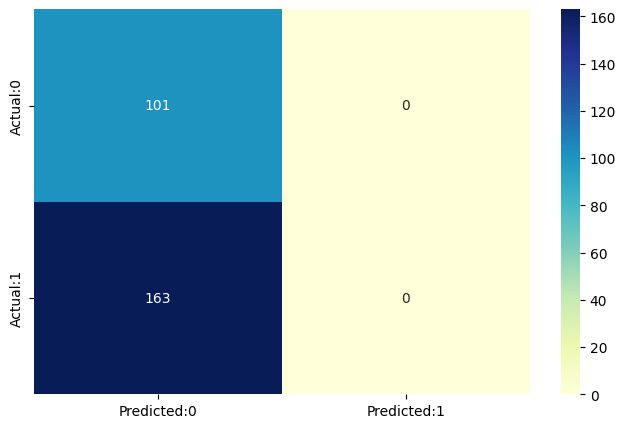

In [1653]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,knn_predict)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [1655]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.38      1.00      0.55       101
           1       0.00      0.00      0.00       163

    accuracy                           0.38       264
   macro avg       0.19      0.50      0.28       264
weighted avg       0.15      0.38      0.21       264



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1657]:
y_pred_test = knn_model.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [1659]:
test.sample(10)

,Actual,Y test predicted
220,0,0
240,1,0
1125,0,0
1134,1,0
351,1,0
54,1,0
724,1,0
231,0,0
1046,0,0
778,1,0


# Deep Learning

In [1662]:
import tensorflow as tf
from tensorflow import keras

# Create neural network

In [1665]:
model=keras.Sequential([
    keras.layers.Dense(4800,input_shape=[21], activation='relu'),
    keras.layers.Dense(2000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'), 
    keras.layers.Dense(1,activation="sigmoid")
])
model.summary()

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 4800)                │         105,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 2000)                │       9,602,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1000)                │       2,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1000)                │       1,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │           1,001 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,710,601 (48.49 MB)

 Trainable params: 12,710,601 (48.49 MB)

 Non-trainable params: 0 (0.00 B)

In [1667]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [1669]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE


Epoch 1/50


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6451 - loss: 0.6449 - val_accuracy: 0.5676 - val_loss: 0.6901
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7446 - loss: 0.5550 - val_accuracy: 0.6255 - val_loss: 0.6691
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7608 - loss: 0.5075 - val_accuracy: 0.7259 - val_loss: 0.6007
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7496 - loss: 0.4887 - val_accuracy: 0.7568 - val_loss: 0.5633
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7791 - loss: 0.4677 - val_accuracy: 0.7181 - val_loss: 0.5917
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7779 - loss: 0.4609 - val_accuracy: 0.7452 - val_loss: 0.5502
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7983 - loss: 0.4288 - val_accuracy: 0.7568 - val_loss: 0.5409
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8054 - loss: 0.4137 - val_accuracy: 0.8147 - val_loss: 0.4778
Epo

# Step 1: Encode the target variable if it's categorical
l

In [1672]:
e = LabelEncoder()
data['class'] = le.fit_transform(data['class'])  # Converts string labels to 0, 1, ...


# Step 2: Split data into features and target


In [1675]:
X = data.drop('class', axis=1)
y = data['class']


# Step 3: Train-test split


In [1678]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





# Step 4: Balance the training set using SMOTE


In [1681]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


# Step 5: Scale the features

In [1686]:

scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Step 6: Convert target to categorical (for binary/multiclass classification)


In [1689]:
y_train_cat = to_categorical(y_train_res)
y_test_cat = to_categorical(y_test)

# Step 7: Build the Neural Network model


In [1694]:
model = Sequential()
model.add(Dense(32, input_dim=X_train_res.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(y_train_cat.shape[1], activation='softmax'))  # softmax for multi-class


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Step 8: Compile the model


In [1697]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Step 9: Train the model


In [1700]:
model.fit(X_train_res, y_train_cat, epochs=50, batch_size=16, verbose=1, validation_split=0.2)


Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5409 - loss: 0.7340 - val_accuracy: 0.6100 - val_loss: 0.6667
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7017 - loss: 0.5818 - val_accuracy: 0.6448 - val_loss: 0.6386
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7129 - loss: 0.5378 - val_accuracy: 0.7568 - val_loss: 0.5709
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7527 - loss: 0.4969 - val_accuracy: 0.8224 - val_loss: 0.4970
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7537 - loss: 0.4869 - val_accuracy: 0.8610 - val_loss: 0.4364
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7921 - loss: 0.4500 - val_accuracy: 0.8726 - val_loss: 0.4362
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7878 - loss: 0.4422 - val_accuracy: 0.9189 - val_loss: 0.3263
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7823 - loss: 0.4405 - val_accuracy: 0.9151 - val_loss:

# Step 10: Evaluate the model


In [1703]:
loss, accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")



Test Accuracy: 80.68%


[Text(0.5, 1.0, 'Correlation Matrix')]

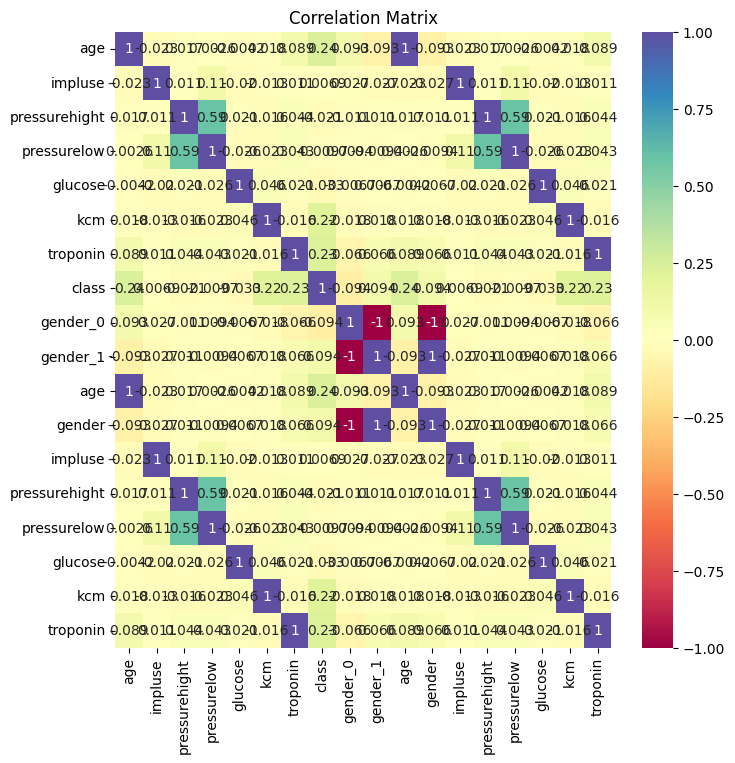

In [1705]:
corr = data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")


In [1708]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(21,)))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))
model.summary()

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                     │ (None, 512)                 │          11,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 520,577 (1.99 MB)

 Trainable params: 520,577 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

In [1710]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [1712]:
from keras.callbacks import EarlyStopping
cb = EarlyStopping(
    monitor='accuracy',
    min_delta=0.001,
    patience=100,
    mode='auto')

# Model 1: Simple Feedforward Neural Network

In [1715]:
model1 = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(y_train_cat.shape[1], activation='softmax')
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.fit(X_train, y_train_cat, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5155 - loss: 4.5864 - val_accuracy: 0.5403 - val_loss: 2.1818
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5684 - loss: 1.4979 - val_accuracy: 0.5592 - val_loss: 1.1565
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5682 - loss: 1.0162 - val_accuracy: 0.6682 - val_loss: 0.7524
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6740 - loss: 0.6893 - val_accuracy: 0.6635 - val_loss: 0.6478
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6783 - loss: 0.7332 - val_accuracy: 0.7109 - val_loss: 0.6323
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6746 - loss: 0.5931 - val_accuracy: 0.6445 - val_loss: 0.6114
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7328 - loss: 0.5539 - val_accuracy: 0.6825 - val_loss: 0.5598
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7321 - loss: 0.5828 - val_accuracy: 0.6872 - val_loss

# Evaluate

In [1718]:
loss, acc = model1.evaluate(X_test, y_test_cat)
print("Model 1 Test Accuracy:", acc)



9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5912 - loss: 0.7612
Model 1 Test Accuracy: 0.564393937587738


# Confusion matrix

In [1726]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt





# Step 1: Predict using the model

In [1729]:

y_pred_prob = model1.predict(X_test)  # Use model2 or model3 if you want
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 




# Step 2: Create confusion matrix

In [1732]:

cm = confusion_matrix(y_true, y_pred)


# Step 3: Convert to DataFrame and plot

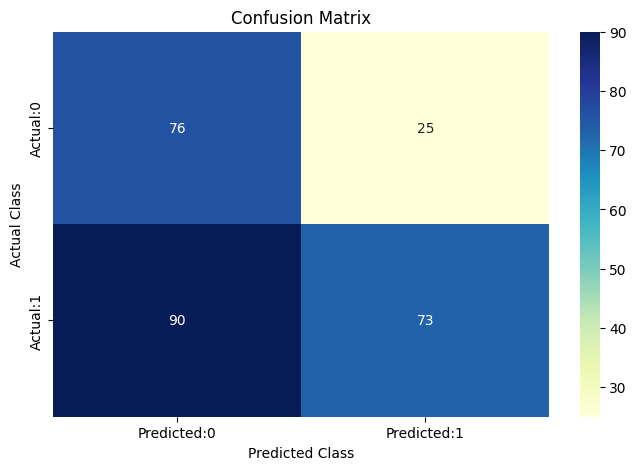

In [1735]:

conf_matrix = pd.DataFrame(data=cm,
                           columns=['Predicted:0', 'Predicted:1'],
                           index=['Actual:0', 'Actual:1'])

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()